In [1]:
import os
import time

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import matplotlib

from nltk.stem.snowball import SnowballStemmer
import nltk
import gensim
import spacy

import matplotlib.cm as cm

stemmer = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")

In [2]:
from tool import *
# unique(x)
# find_kol(data,rank)
# unique_time(data)
# exforeign(data)
# duplicate(data)
# remove_link(data)
# remove_sign(data)
# total_clean(indata)
# toword(data,stem=False,stop=True)
# get_words(url), pos, neg, opinion
# debug2(sentence)

In [3]:
root_path=os.getcwd()
keywords=os.listdir(root_path+'\\data\\')

In [4]:
root_path

'C:\\Users\\rfmen\\Desktop\\Competition'

In [5]:
'''
for y in range(2018,2021):
    for m in range(1,13):
        begin=time.time()
        temp=[]
        if y==2018 and m<=3:
            continue
        elif y==2020 and m>=6:
            break
        else:
            for _ in keywords:
                try:
                    temp+=json.load(open('{}//data//{}//{}{}-{:02d}.json'.format(root_path,_,_,y,m)))
                except:
                    continue
            data1=[]
            for z in temp:
                if z['retweets']>0 or z['likes']>0 or z['is_replied'] or z['is_reply_to'] or z['replies']:
                    data1.append(z)
                    
            data1=total_clean(data1)
            
            result=[]
            for x,k in enumerate(data1):
                d=debug2(k['text']).items()
                if d: result.append(list(d))
            with open("{}\\roughmerging\\{}-{:02d}.txt".format(root_path,y,m), "w") as file:
                file.write(str(result))
            print(y,m,':',round(time.time()-begin,2),';',len(result),len(data1),len(temp))
'''

'\nfor y in range(2018,2021):\n    for m in range(1,13):\n        begin=time.time()\n        temp=[]\n        if y==2018 and m<=3:\n            continue\n        elif y==2020 and m>=6:\n            break\n        else:\n            for _ in keywords:\n                try:\n                    temp+=json.load(open(\'{}//data//{}//{}{}-{:02d}.json\'.format(root_path,_,_,y,m)))\n                except:\n                    continue\n            data1=[]\n            for z in temp:\n                if z[\'retweets\']>0 or z[\'likes\']>0 or z[\'is_replied\'] or z[\'is_reply_to\'] or z[\'replies\']:\n                    data1.append(z)\n                    \n            data1=total_clean(data1)\n            \n            result=[]\n            for x,k in enumerate(data1):\n                d=debug2(k[\'text\']).items()\n                if d: result.append(list(d))\n            with open("{}\\roughmerging\\{}-{:02d}.txt".format(root_path,y,m), "w") as file:\n                file.write(str(resu

In [6]:
result=[]
for i in range(2015,2021):
    for j in range(1,13):
        try:
            with open("C:\\Users\\rfmen\\Desktop\\Competition\\roughmerging\\{}-{:02d}.txt".format(i,j), "r") as file:
                temp=eval(file.readline())
                result.append(temp)
        except:
            continue

In [7]:
def analyze(x):
    result={}
    for i in x:
        d=dict(i)
        for j in d:
            if j not in result:
                result[j]=(d[j],1)
            else:
                result[j]=(result[j][0]+d[j],result[j][1]+1)
    return list(result.items())

In [8]:
a=[analyze(i) for i in result]
month=[]
for y in range(2017,2021):
    for m in range(1,13):
        if y==2017 and m<=5:
            continue
        elif y==2020 and m>=6:
            break
        else:
            month.append('{}-{:02d}'.format(y,m))

In [9]:
for i in range(len(month)):
    temp=sorted(analyze(result[i]),key=lambda x: -x[1][1])
    #word=[i[0]+': '+str(round(i[1][0]/i[1][1],2)) for i in temp]
    word=[i[0] for i in temp]
    #print(month[i],'\t',word[2:])
    print(month[i],'\t',temp[10:20])

2017-06 	 [('wellsfargo', (-7, 34)), ('fraud', (-33, 33)), ('roboadvisor', (28, 32)), ('accounts', (-12, 29)), ('team', (23, 29)), ('thanks', (22, 28)), ('banks', (-6, 28)), ('millennials', (24, 26)), ('way', (11, 25)), ('roboadvisors', (3, 25))]
2017-07 	 [('consumers', (-29, 47)), ('time', (2, 40)), ('thanks', (19, 39)), ('people', (7, 37)), ('support', (37, 36)), ('issue', (-35, 35)), ('banks', (-1, 34)), ('way', (23, 33)), ('fraud', (-28, 32)), ('bank fraud', (-30, 32))]
2017-08 	 [('fraud', (-49, 48)), ('time', (14, 46)), ('accounts', (-22, 46)), ('people', (12, 45)), ('design thinking', (44, 44)), ('support', (42, 42)), ('issue', (-40, 41)), ('customers', (-15, 39)), ('problem', (-32, 36)), ('day', (26, 35))]
2017-09 	 [('market', (43, 45)), ('one', (39, 45)), ('thanks', (28, 42)), ('day', (27, 41)), ('banks', (0, 40)), ('advisors', (0, 33)), ('issues', (-37, 32)), ('job', (9, 30)), ('wellsfargo', (1, 29)), ('team', (18, 28))]
2017-10 	 [('fraud', (-53, 52)), ('wealth', (37, 49))

In [10]:
sorted(a[2],key=lambda x: -x[1][1])

[('bank', (-6, 96)),
 ('banks', (-20, 68)),
 ('innovation', (66, 66)),
 ('money', (1, 65)),
 ('scandal', (-56, 58)),
 ('wells fargo', (-34, 58)),
 ('issues', (-55, 54)),
 ('account', (4, 54)),
 ('work', (54, 52)),
 ('design', (48, 48)),
 ('fraud', (-49, 48)),
 ('time', (14, 46)),
 ('accounts', (-22, 46)),
 ('people', (12, 45)),
 ('design thinking', (44, 44)),
 ('support', (42, 42)),
 ('issue', (-40, 41)),
 ('customers', (-15, 39)),
 ('problem', (-32, 36)),
 ('day', (26, 35)),
 ('fees', (-18, 34)),
 ('service', (5, 33)),
 ('business', (6, 33)),
 ('thanks', (26, 32)),
 ('roboadvisors', (20, 32)),
 ('wealth', (7, 29)),
 ('app', (-9, 29)),
 ('inconvenience', (-28, 28)),
 ('market', (24, 28)),
 ('one', (17, 28)),
 ('management', (8, 28)),
 ('way', (17, 26)),
 ('tdameritrade', (2, 26)),
 ('team', (17, 25)),
 ('today', (13, 25)),
 ('shit', (-25, 25)),
 ('customer', (5, 24)),
 ('risk', (-21, 23)),
 ('wellsfargo', (-4, 23)),
 ('roboadvisor', (14, 22)),
 ('investment', (-2, 22)),
 ('businesses',

### Keyword: Bitcoin

In [11]:
def bitcoin(a):
    block=['blockchain','cypto','bitcoin','btc','bch']
    bresult=[]
    for i in a:
        bresult.append([])
        for j in block:
            for k in i:
                if j in k[0].lower():
                    bresult[-1].append(k)
    num=[]
    freq=[]
    for i in bresult:
        if i:
            a,b=0,0
            for j in i:
                a+=j[1][0]
                b+=j[1][1]
            freq.append(b)
            num.append(a/b)
        else:
            num.append(0)
            freq.append(0)
    return num,freq

In [253]:
'''
matplotlib.rcParams['figure.dpi'] = 100
BTC=pd.read_csv('BTC-USD.csv')
p=BTC['Adj Close'].iloc[-36:].values
num=np.array(bitcoin(a)[0])
freq=np.array(bitcoin(a)[1])


fig, ax1 = plt.subplots()
ax1.plot(np.array(month),p,color='black',zorder=-1)
ax1.scatter(np.array(month)[num!=0],p[num!=0],c=num[num!=0],cmap=cm.bwr,zorder=2)
ax1.set_xticks(np.arange(36))
ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(month)],rotation=45)
for t in ax1.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax1.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)

ax2 = ax1.twinx()
for t in ax2.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax2.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
ax2.set_xticks(np.arange(36))
ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(month)],rotation=45)
ax2.bar(month,freq,alpha=0.3)



plt.clim(-1,1)
cbar = fig.colorbar(ax,boundaries=np.linspace(-1,1,11))
cbar.set_label('Sentiment Polarity')


plt.show()
'''

"\nmatplotlib.rcParams['figure.dpi'] = 100\nBTC=pd.read_csv('BTC-USD.csv')\np=BTC['Adj Close'].iloc[-36:].values\nnum=np.array(bitcoin(a)[0])\nfreq=np.array(bitcoin(a)[1])\n\n\nfig, ax1 = plt.subplots()\nax1.plot(np.array(month),p,color='black',zorder=-1)\nax1.scatter(np.array(month)[num!=0],p[num!=0],c=num[num!=0],cmap=cm.bwr,zorder=2)\nax1.set_xticks(np.arange(36))\nax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(month)],rotation=45)\nfor t in ax1.xaxis.get_ticklines():\n    t.set_visible(False)\nfor t in ax1.xaxis.get_ticklines()[::2][::3]:\n    t.set_visible(True)\n\nax2 = ax1.twinx()\nfor t in ax2.xaxis.get_ticklines():\n    t.set_visible(False)\nfor t in ax2.xaxis.get_ticklines()[::2][::3]:\n    t.set_visible(True)\nax2.set_xticks(np.arange(36))\nax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(month)],rotation=45)\nax2.bar(month,freq,alpha=0.3)\n\n\n\nplt.clim(-1,1)\ncbar = fig.colorbar(ax,boundaries=np.linspace(-1,1,11))\ncbar.set_label('Sentiment Pol

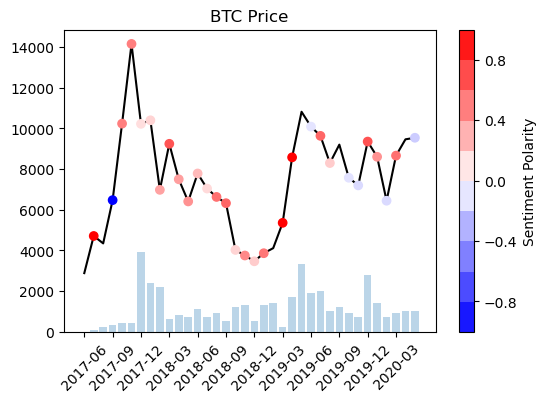

In [12]:

matplotlib.rcParams['figure.dpi'] = 100
BTC=pd.read_csv('BTC-USD.csv')
p=BTC['Adj Close'].iloc[-36:].values
num=np.array(bitcoin(a)[0])
freq=np.array(bitcoin(a)[1])



plt.plot(np.array(month),p,color='black',zorder=-1)
plt.scatter(np.array(month)[num!=0],p[num!=0],c=num[num!=0],cmap=cm.bwr)
plt.title('BTC Price')
locs,labels=plt.xticks(np.arange(36),[i if x%3==0 else '' for x,i in enumerate(month)],rotation=45)
ax=plt.gca()
for t in ax.xaxis.get_ticklines():
    t.set_visible(False)
for t in ax.xaxis.get_ticklines()[::2][::3]:
    t.set_visible(True)
plt.clim(-1,1)
plt.bar(month,100*freq,alpha=0.3)
cbar = plt.colorbar(boundaries=np.linspace(-1,1,11))
cbar.set_label('Sentiment Polarity')
plt.show()

Correlation: 0.012488324798973835


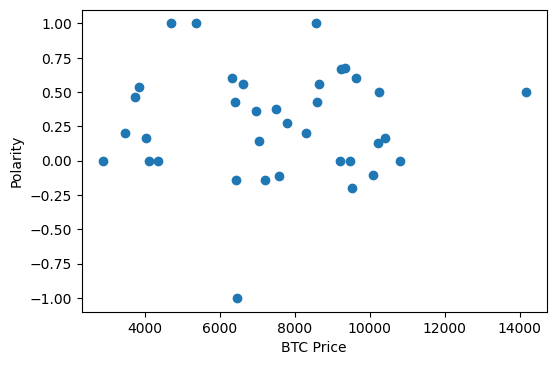

In [13]:
print('Correlation:',np.corrcoef(num,p)[0][1])
plt.scatter(p,num)
plt.ylabel('Polarity')
plt.xlabel('BTC Price')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit([[i] for i in np.log(p)],freq)
print(reg.coef_,reg.intercept_)

[9.73666253] -74.66052012154775


Correlation: 0.417041826460369


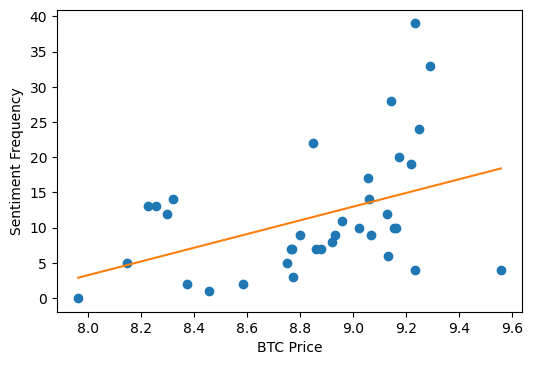

In [15]:
print('Correlation:',np.corrcoef(np.log(p),freq)[0][1])
x=np.linspace(np.min(np.log(p)),np.max(np.log(p)),100)
plt.scatter(np.log(p),freq)
plt.ylabel('Sentiment Frequency')
plt.xlabel('BTC Price')
plt.plot(x,x*reg.coef_+reg.intercept_,color='C1')
plt.show()

In [35]:
def subanalyze(aresult,key,cin=True):
    result=[]
    for i in aresult:
        s=0
        for j in dict(i):
            for k in key:
                if k in j.lower() and cin:
                    s=1
                elif k == j.lower() and not cin:
                    s=1
        if s:
            result.append(i)
    return result

In [43]:
sorted(analyze(subanalyze(result[20],['advisor','advisors'],cin=False)),key=lambda x:-x[1][1])

[('advisors', (47, 55)),
 ('advisor', (10, 16)),
 ('management', (5, 7)),
 ('platform', (6, 6)),
 ('time', (3, 5)),
 ('clients', (3, 5)),
 ('advice', (3, 5)),
 ('years', (5, 5)),
 ('wealth managers', (5, 5)),
 ('wealth', (5, 5)),
 ('institutions', (4, 4)),
 ('damages', (-4, 4)),
 ('roaring', (3, 3)),
 ('round', (3, 3)),
 ('applause', (3, 3)),
 ('brokerage', (3, 3)),
 ('firm', (3, 3)),
 ('space', (3, 3)),
 ('rias', (3, 3)),
 ('level', (3, 3)),
 ('assets', (3, 3)),
 ('fun', (3, 3)),
 ('funds', (2, 2)),
 ('solutions', (2, 2)),
 ('way', (2, 2)),
 ('market', (2, 2)),
 ('industry', (0, 2)),
 ('husband', (0, 2)),
 ('phone', (0, 2)),
 ('attproam', (1, 1)),
 ('weekend', (1, 1)),
 ('percent', (1, 1)),
 ('deposit', (1, 1)),
 ('bank', (1, 1)),
 ('trueask', (1, 1)),
 ('today', (1, 1)),
 ('challengesopportunities', (1, 1)),
 ('period', (1, 1)),
 ('biz', (1, 1)),
 ('strategy', (1, 1)),
 ('fee', (1, 1)),
 ('index', (1, 1)),
 ('nuance', (1, 1)),
 ('person', (1, 1)),
 ('equities', (1, 1)),
 ('leftover',

In [48]:
subanalyze(result[19],['roboadvisor','robo advisor','robo'])

[[('roboadvisors', 1),
  ('services', 1),
  ('platforms', 1),
  ('ones', 1),
  ('education', 1)],
 [('roboadvisors', -1), ('formula', -1)],
 [('robots', -1), ('shortage', -1), ('slack', -1)],
 [('things', 1),
  ('investment', 1),
  ('world', 1),
  ('advisor', 1),
  ('allinone', 1),
  ('etfs', 1),
  ('year', 1),
  ('robos', 1),
  ('portfolios', 1),
  ('cost', 1)],
 [('stock', 1),
  ('stock positions', 1),
  ('w money retirement planning', 1),
  ('robo advisors', -1),
  ('stay', 1)],
 [('advisors', 1), ('robo', 1)],
 [('discussion', 1),
  ('millennials', 1),
  ('industry', 1),
  ('cfainstitute', 1),
  ('research', 1),
  ('roboadvisors', 1),
  ('advisors', 1),
  ('needs', 1)],
 [('builtin tax efficiency', 1),
  ('roboadvisors', 1),
  ('rebalancing', 1),
  ('congratulations', 1),
  ('survey', 1)],
 [('robo advisor', 1)],
 [('robo advisor', 1)],
 [('roboadvisor', 1)],
 [('robo advisor service', 1)],
 [('robo advisor', 1), ('robo advisors', 1), ('advisor', 1), ('investors', 1)],
 [('investor

In [18]:
blockchain=['blockchain','cypto','bitcoin','btc','bch']
for i in texts[4]:
    for j in blockchain:
        if j in i.lower():
            print(i,'\n')

drewdoesbiz You clearly have ZERO idea what you are talking about My experience crushes yoursread profile and BTC will make you jobless 

I respect your opinion but crypto is getting more mainstream each and everyday goldman sachs is interested in starting to trade BTC so 

You nust have just heard of ripple before bitcoin and stopped there You know merrill lynch bank of America own it right 

XRP There is a rumor Ripple is forming a partnership with Bank of America Merrill Lynch and this partnership XLM STR Mona PKB BTC  

 blockchain roboadvisors expected to be the top investments for over the next 1 to 3 years  

It makes me wonder guys TDAmeritrade where is BTC on the road map for deposits I really hate the fees 

NicSherrod hi nicole wow you are a bitcoin trader kool You dont work for td ameritrade mobile app anymore i remember chatting with you early this yr was going to ask you a question t d ameritrade but shoot should ask you about digital currency good for you 

Love this ide

### Overall

In [17]:
texts=[]
for i in range(2015,2021):
    for j in range(1,13):
        try:
            with open("C:\\Users\\rfmen\\Desktop\\Competition\\roughtext\\{}-{:02d}.txt".format(i,j), "r") as file:
                temp=eval(file.readline())
                texts.append(temp)
        except:
            continue
print(len(texts))

36


In [52]:
def subsearch(a,keywords,cin=True):
    bresult=[]
    for i in a:
        bresult.append([])
        for j in keywords:
            for k in i:
                if cin:
                    if j in k[0].lower():
                        bresult[-1].append(k)
                else:
                    if j == k[0].lower():
                        bresult[-1].append(k)
    num=[]
    freq=[]
    for i in bresult:
        if i:
            a,b=0,0
            for j in i:
                a+=j[1][0]
                b+=j[1][1]
            freq.append(b)
            num.append(a/b)
        else:
            num.append(0)
            freq.append(0)
    return num,freq

In [21]:
cnt1=0
cnt2=0
for i in texts[4]:
    for j in ['account']:
        if j in i.lower():
            cnt1+=1
            if 'wells fargo' in i.lower() or 'wellsfargo' in i.lower():
                cnt2+=1
            print(i,'\n')
print(cnt1,cnt2)

Sounds great I was shocked when SantanderBankUS charged me for a new checkbook I cancelled my account in a New York Minute 

I called twice your customer service said theres nothing wrong with your account info for ANZ Australia But there is 

Started full time in May This the difference between going to college and working via my Charles schwab savings account  

CharlesSchwab hi I deposited my first paycheck yesterday into my new checking account How long until it is available usually Thanks 

Look at your website for transfer of money via ANZ Bank your account number is incorrect 

Ya i feel you my account has been restricted for some reason for the past two days 

Wait times are always longer than usual when are they ever shorter The Schwab customer experience falls short on all accounts 

sitting on hold CharlesSchwab because they transferred my optionsxpress account and everything is a mess smh 

My optionsxpress account transferred over to CharlesSchwab and is totally Fukt looks

In [22]:
for i in texts[-3]:
    if ' app ' in i.lower():
        print(i,debug2(i))

I prefer to use my stock broker app CharlesSchwab {'stock': 1, 'broker': 1, 'app': 1}
CharlesSchwab your website and app wont let me log in Now more than ever its important to know how much money I have wtf {'website': 1, 'app': 1, 'money': 1}
Ive settled for TDA and use the ToS mobile trading app I havent tried Fidelity or Charles Schwab yet My investing strategy is buying dividend growth stocks like Microsoft Apple and JNJ {'strategy': 1, 'dividend growth stocks': 1}
Whos your broker You dont use like a Robinhood or a Charles Schwab app like the rest of us {'charles schwab app': 1}
CharlesSchwab your options trade calculator in Android app no longer provides useful analysis It only shows PL calculations on one side of the strike Used to work a couple weeks ago {'strike': -1, 'analysis': 1}
To all my friends with trust funds dont open that Charles Schwab app covid19 isnt lethal for under30s but that could be {'trust': 1, 'charles schwab app': -1}
What has happened to yall since Charle

TD ameritrade glitch app showing the right numbers {'glitch': -1, 'numbers': 1}
Its absolutely I constantly have to shut down the app and reopen just to maintain accuracy with my positions and L2 TDAmeritrade thinkorswim u suck bigly {'suck': -1}
Robinhood is very simple to use but is pretty limited in what it offers I just started using TD Ameritrade Very pleased so far Very nice app for phone usage {'app': 1}
Did that Cant login because both apps use nonstandard ports Apps just sit there looking dumb BTW the latter app is depreciated Why are you promoting it {'btw': -1}
Hello If you are experiencing login issues try to force stop the app and log in again or uninstallreinstall If you are still experiencing issues give our Technical Support a call at 8006693900 We would be glad to take a look NK {'issues': -1}
Hello Stephen You can download either the thinkorswim app or the TD Ameritrade app from your Play Store on your phone Feel free to contact our Technical Support at 8006693900 if 

You dont have to spend 200 its free with Think or Swim app and TD Ameritrade app {'app': 1}
Were working to get lagging issues resolved with the thinkorswim platform and appreciate your patience Until this is fixed our thinkorswim mobile app and our website are available ZJ {'issues': 1, 'website': 1, 'patience': 1}
We are aware and are working to correct the lagging issues As a work around you may want to try our thinkorswim mobile app until we get this resolved Thanks for your patience ZJ {'work': 1, 'issues': -2, 'patience': 1}
TDAmeritrade I never used the social sign segment of the app or on the desktop For me it was useless Still a great online brokerage  {'online': 1, 'brokerage': 1}
There are no reported issues with our app at present Wed like the opportunity of helping you Please call 18006693900 to speak with our tech team so they can review your app settings with you ZJ {'issues': -1}
Hi Kevin thanks for reaching out to us Our tech team is aware of the chart lagging and are 

Hi we apologize for the earlier TOS app issues We have the app corrected now Please forcestop and restart your phone If you continue seeing issues please reach out to us as were glad to assist you ZJ {'issues': -1, 'tos app issues': -1}
Ok Anyway I can turn this off just for Mobile app It is confusing as hard to determine position exit price point Thanks {'app': -1, 'position': -1, 'exit': -1, 'price': -1, 'point': -1, 'thanks': -1}
We apologize for the system issues The tos mobile issues have been corrected but we still have some ongoing challenges with the thinkorswim platform We hope to have this resolved soon As a workaround our website and TD Ameritrade Mobile app are available ZJ {'issues': -1, 'mobile app': 1}
We regret the lagging issues and are working to correct this In the meantime as a workaround our website and TD Ameritrade mobile app are available We hope resolve this soon If there are any entered orders youd like reviewed please call 8006722098 ZJ {'app': 1, 'issues': -

TDAmeritrade your app canceled my limit order and filled me somehow way above what the limit was Here is the evidence Please fix I started down a ton  {'limit': -1}
TRASH totally didnt expect this sorry you signed up TDAmeritrade is a good app and I am liking We Bull as well im closing my RH  {'app': 1}
Hey Fidelity or TDAmeritrade I promise to jump ship from RobinhoodApp if you build an app for us millennials We hate the complexity you provide and love the simplicity RH provides Option trades takes 5 seconds on RH vs 50 on your platforms Too much for non boomers {'simplicity': 1, 'complexity': -1}
What do you guy think about webull Great working app Trade Stocks ETFs and Options on Webull Open a Webull brokerage account and receive ONE 1 free stock Deposit ANY amount and get an additional free stock  {'stock': 1}
Im so ready to sell indoor weed right now and say fuck this whole market til the feds cut rates oh wait then every app is gonna fail yeah Im ready to sell weed right now wtf 

I apologize for the long wait and experience Were you able to send us a secure email through Wells Fargo Online or our mobile app For security reasons do not include account numbers Shaun  {'email': 1}
How were you able to take a screenshot of wells Fargo app mine does not allow screenshot due to security concerns {'security concerns': -1}
WellsFargo Your app isnt allowing me to sign in Thankfully I was able to sign in via your website Dont need a response Just letting you know theres a problem {'problem': -1}
Oh great I dont have a contactless card Wells Fargo it doesnt help me now that I have 2 take the long long way out of Staten Island as opposed to having the ability to pay via an app thats not available {'card': 1, 'way': 1, 'ability': 1, 'app': 1}
Hi there I get an error message when I try to log in through the app but then when I try to log in online I get a message that says that the site is currently down {'error': -1}
WellsFargo just refused my HELOC APP on a house that full

In [23]:
for i in texts[4]:
    if 'risk' in i.lower():
        print(i,debug2(i))

Maybe due to a lot of bank infra being a lot older and shoehorning new stuff into legacy is complex and has high risk  {'risk': -1}
Love my debit card by canceling overdraft I can know the amount shown as my balance is all that can be stolen I control my risk {'risk': -1}
All roboadvisors do is package a 17step risk questionnaire So thats why BlackRock invested in ScalableCapital for a pretty website {'risk': -1, 'website': 1}
lol risk adjusted return of cash is better says robo advisor person Um its negative real return  {'risk': -1, 'return': -1}
How about a roboadvisor for Using HomeUnion investors can buy rentals based in their preferences and risk profile {'roboadvisor': -1, 'investors': -1, 'rentals': -1, 'preferences': -1, 'profile': -1}
Factor investing machine learning junior traders momentum roboadvisors risk parity Recency bias writ large {'parity recency bias': -1}
Are roboadvisors risky  {'roboadvisors': -1}
Great If youd like to try without risking your money download thi

In [24]:
key_trend=[sorted(i,key= lambda x: -x[1][1])[:30] for i in a]
key_trend

[[('bank', (14, 71)),
  ('work', (64, 54)),
  ('management', (39, 54)),
  ('wealth', (39, 52)),
  ('support', (55, 51)),
  ('wells fargo', (-33, 51)),
  ('money', (-1, 50)),
  ('people', (4, 44)),
  ('account', (1, 40)),
  ('time', (10, 40)),
  ('wellsfargo', (-7, 34)),
  ('fraud', (-33, 33)),
  ('roboadvisor', (28, 32)),
  ('accounts', (-12, 29)),
  ('team', (23, 29)),
  ('thanks', (22, 28)),
  ('banks', (-6, 28)),
  ('millennials', (24, 26)),
  ('way', (11, 25)),
  ('roboadvisors', (3, 25)),
  ('business', (10, 24)),
  ('customer', (4, 24)),
  ('issues', (-22, 23)),
  ('shit', (-18, 22)),
  ('card', (-7, 21)),
  ('promises', (20, 20)),
  ('advisors', (6, 20)),
  ('wealth management', (14, 20)),
  ('years', (3, 19)),
  ('market', (7, 18))],
 [('advisors', (80, 88)),
  ('bank', (2, 76)),
  ('money', (19, 72)),
  ('account', (-22, 70)),
  ('wealth', (32, 64)),
  ('management', (36, 64)),
  ('wealth management firms', (63, 63)),
  ('wells fargo', (-45, 60)),
  ('accounts', (-25, 51)),
  

### Keyword: App

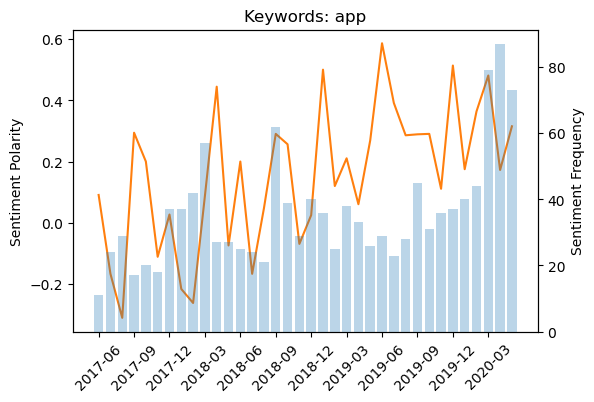

In [54]:
def trend(keyword_list,cin=True):
    app=subsearch(a,keyword_list,cin=cin)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots()
    ax1.plot(np.array(month),app[0],color='C1')
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(month)],rotation=45)
    ax1.set_ylabel('Sentiment Polarity')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(month)],rotation=45)
    ax2.bar(month,app[1],alpha=0.3)
    ax2.set_ylabel('Sentiment Frequency')
    ax1.set_title('Keywords: '+', '.join(keyword_list))
    plt.show()
trend(['app'],cin=False)

In [26]:
print(len(texts[-7]))
(len(result[-7]))

8408


8408

In [295]:
for i in texts[-7]:
    d=debug2(i)
    if 'app' in [i.lower() for i in d] or 'apps' in [i.lower() for i in d]:
        print(i,d,'\n')

This sounds like the app STASH {'app': 1} 

It doesnt work still and I am unable to login and the app still doesnt let me in still it validates my Face ID {'app': -1, 'face': -1} 

I would like to make a repeated automatic transfer to a family member from my CharleSchwab checking account to the family members bank account via Zelle I cant seem to do a repeat payment via the Zelle app {'transfer': 1, 'family': 1, 'member': 1, 'account': 1, 'members': 1, 'bank': 1, 'repeat': 1, 'payment': 1, 'app': 1} 

I love it you are better than Fidelity But but ETRADE app is undefeated till now They allow you to setup price alerts at any price And when you get a notification you really see it believe me It isnt connectivity issue is your app what needs some changes Fidelitys worst {'app': -1, 'connectivity issue': -1} 

Hello TDAmeritrade TDAmeritradePR since yesterday my mobile app for android dont work So today I uninstalled it But now I cant find it on play store Do you know what happens {'app': 

In [268]:
for i in texts[-2]:
    if ' app ' in i.lower():
        print(i)

Yes Did a test between fidelity tos and Schwab 500mbps dedicated business line IP and huge lag on ToS most opens and normal trading in charts ToS gets orders in chunks so like a few in one not one by one when generating charts ToS mobile app is legit Schwab app no good
Hoping Charles Schwab improves on it all and keep the ToS app and make it the main mobile app It is legit Think deal is done by mid to end of year Not sure when we may see platform enhancements etc
CharlesSchwab new update for the mobile app this morning but can not download from the App Store Server issues
Ive heard good things about Robinhood Charles Schwab is 0 commission and has an app as well though Haha
BankofAmerica Ive been a customer since 2007 and we are quarantined due to and yet you wont let me deposit my paycheck through the app Very disappointing But great news for CharlesSchwab which didnt seem to mind 
charles schwab has great customer service buy what you know dont just buy because everyone else has List

### Keyword: Robo Advisor

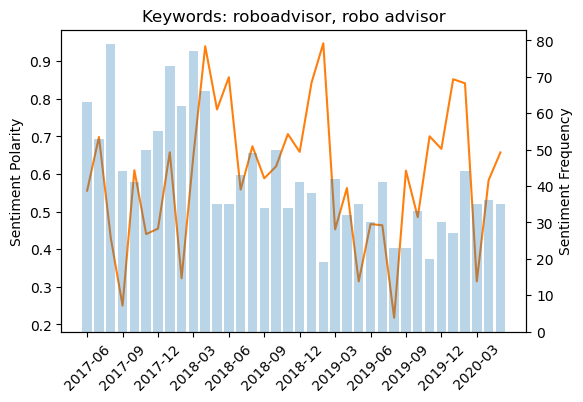

In [305]:
T

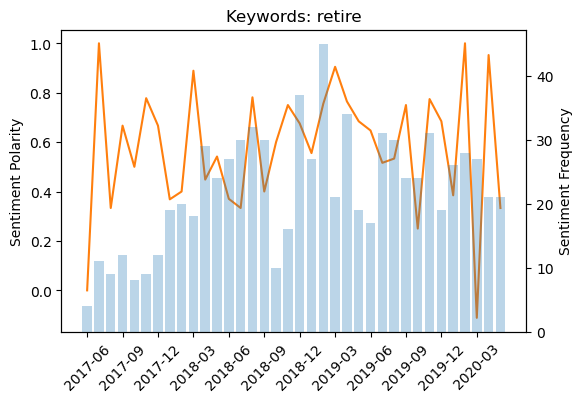

In [53]:
trend(['retire'])

In [64]:
subanalyze(result[-12],['401k'])

[[('brokerage', 1),
  ('firm', 1),
  ('401k', 1),
  ('self', 1),
  ('shares', 1),
  ('thanks', 1)],
 [('suspicion', -2), ('love', 1), ('401k', -2), ('bonesylol', 1)],
 [('401k', -1), ('debt', -1)],
 [('401k', 1), ('account', 1), ('over', 1)]]

### Keyword: 

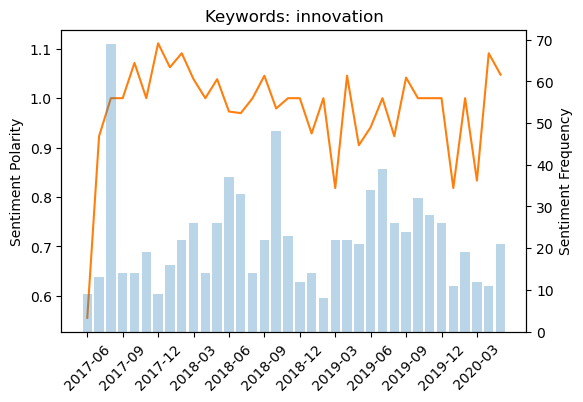

In [306]:
trend(['innovation'])

In [66]:
subanalyze(result[3],['advisor','advisors'],cin=False)

[[('advisors', -1), ('recession', -1)],
 [('advisors', -1)],
 [('advisors', 1), ('new bnymellonwealth recruit', 1)],
 [('advisors', 1), ('new bnymellonwealth recruit', 1)],
 [('advisors', 1), ('indians', 1)],
 [('time', 1), ('money', 1), ('advisor', 1), ('trend', 1)],
 [('advisors', -1), ('exams', -1)],
 [('advisors', 1)],
 [('advisors', -2)],
 [('advisor', 1)],
 [('advisors', -1), ('critic', -1)],
 [('advisors', -1), ('critic', -1)],
 [('advisors', -1)],
 [('advisor', 1)],
 [('advisors', -1), ('siri', -1), ('alexa', -1)],
 [('advisors', -1), ('siri', -1), ('alexa', -1)],
 [('advisor', 1)],
 [('advisor', 1), ('app', 1), ('money', 1)],
 [('advisors', -1)],
 [('advisors', -1), ('siri', -1), ('alexa', -1)],
 [('advantage', 1), ('advisors', 1)],
 [('take', 1), ('advisors', 1)],
 [('advisors', -1), ('rise', -1)],
 [('advisors', 1), ('technology', 1), ('efficiency', 1)],
 [('advisor', 1)],
 [('advisor', 1)],
 [('usa canada australia', 1), ('advisors', 1)],
 [('robohuman', 1),
  ('approach', 

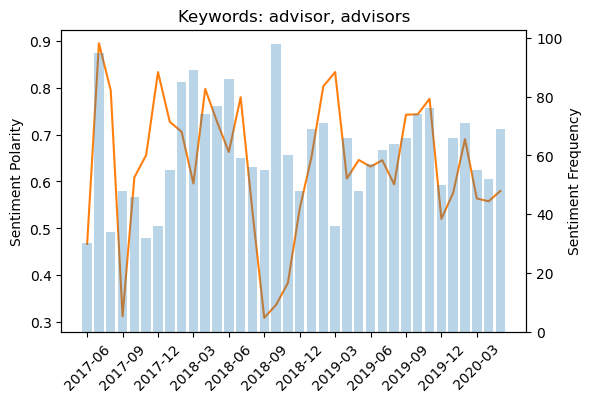

In [65]:
trend(['advisor','advisors'],cin=False)

In [322]:
for x,i in enumerate(result[10]):
    for j in ['advisor','advisors']:
        for k in i:
            if j == k[0].lower():
                print(texts[10][x],'\n')

 You have totally lost to your cheap advisors RG you even dont know that works for unity of all hindus betterment of society It is a favourite trick of the dynasty party to divide hindus rule you are completely exposed People of India vote u out RSSorg 

6 Best Low Fee Robo Advisors 3 Ones If youre ready to turn over your investment management to a pro so you have more time for living then check out these digital financial advisors M1Finance betterment  

Big brokerages like Merrill Lynch Morgan Stanley JPMorgan and Wells Fargo prohibit their financial advisors from making cryptocurrency but some brokers still tell clients to make a personal investment  

Meet Mrs Sandra Hatcher A former Merrill Lynch financial advisor and current resident of The Heritage Sandra celebrated last weeks Tax Day thanks to a credit that saves seniors living in thousands of dollars each year  

Merrill Lynch Morgan Stanley JPMorgan and Wells Fargo prohibit their financial advisors from making cryptocurrency 

In [321]:
for x,i in enumerate(result[16]):
    for j in ['advisor','advisors']:
        for k in i:
            if j == k[0].lower():
                print(texts[16][x],'\n')

Interested to see how Betterment Wealthfront and other robo advisors will perform for customers when the economy starts to turn sour Genuinely curious 

I know its late notice But you can join us at Impact in DC We work with advisors of all sizes and would love to host you to tell you more about CharlesSchwab custody offering 

Nearly 60 of Americans expect to use a robo advisor by 2025 yet 43 prefer some human assistance for financial activities Learn more in Charles Schwabs Consumer Digital Demands survey  

Wed love to have you join us at IMPACT 2018 We are passionate about supporting advisors of all sizes and specializations and would like to host you so you can learn more about CharlesSchwab custody offering 

Like I dont have enough invested with Schwab so they took away my investment advisor and now theyre running this BS ad 

Join us at IMPACT 2018 in DC We work with advisors of all sizes and specializations and would like to host you to learn about CharlesSchwab custody offeri

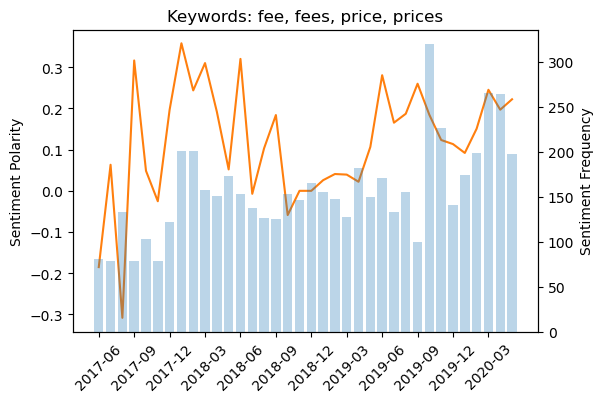

In [308]:
trend(['fee','fees','price','prices'])

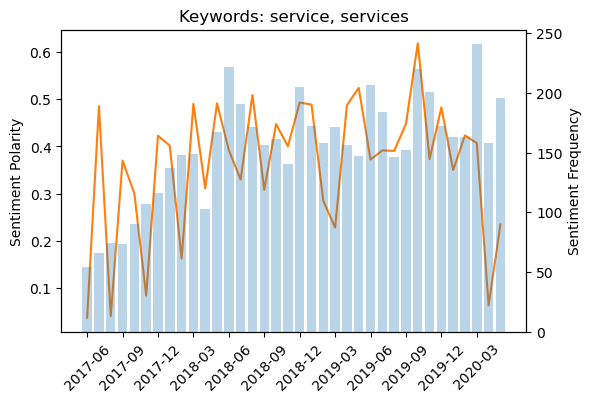

In [309]:
trend(['service','services'])